In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
from utils import *
from models import *

In [2]:
x, y = get_data()

Text(0, 0.5, 'Sexual Assault Risk, Male')

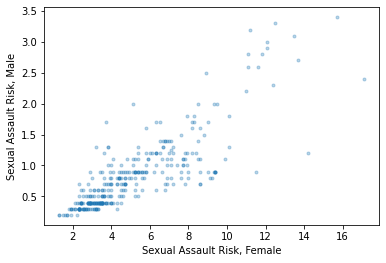

In [3]:
plt.scatter(x, y, marker=".", color="tab:blue", alpha=0.3)
plt.xlabel("Sexual Assault Risk, Female")
plt.ylabel("Sexual Assault Risk, Male")

In [4]:
linear_model, error = tune_with_cv(LinearRegression, "Linear Regression", [], x, y)
spline_model, error = tune_with_cv(SmoothingSpline, "Cubic Spline", 
                            np.linspace(10, 15, 30), x, y)
local_linear_model, error = tune_with_cv(LocalLinearRegression, "Local Linear Regression", 
                                         np.linspace(1, 6, 30), x, y)
        

Cross-validation error for Linear Regression: 35.78685030656533
Cubic Spline with param 10.0: Error = 76.08757039560078
Cubic Spline with param 10.172413793103448: Error = 65.23121331125402
Cubic Spline with param 10.344827586206897: Error = 57.116496250454055
Cubic Spline with param 10.517241379310345: Error = 50.59800158654186
Cubic Spline with param 10.689655172413794: Error = 45.817185716042545
Cubic Spline with param 10.862068965517242: Error = 41.33483074587622
Cubic Spline with param 11.03448275862069: Error = 37.8534341803434
Cubic Spline with param 11.206896551724139: Error = 36.09243034051827
Cubic Spline with param 11.379310344827587: Error = 34.47222626251964
Cubic Spline with param 11.551724137931036: Error = 33.03195480997812
Cubic Spline with param 11.724137931034482: Error = 32.58786224974513
Cubic Spline with param 11.89655172413793: Error = 32.253631002761274
Cubic Spline with param 12.068965517241379: Error = 32.183249785489004
Cubic Spline with param 12.241379310344

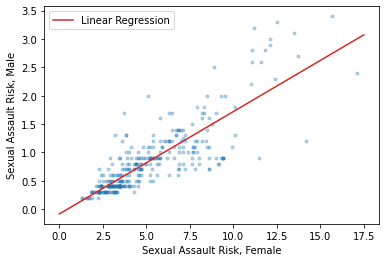

In [6]:
plotx = np.linspace(0, 17.5, 500)
linear_y = linear_model.predict(plotx)
plt.scatter(x, y, marker=".", color="tab:blue", alpha=0.3);
plt.plot(plotx, linear_y, color="tab:red");
plt.xlabel("Sexual Assault Risk, Female");
plt.ylabel("Sexual Assault Risk, Male");
plt.legend(['Linear Regression']);

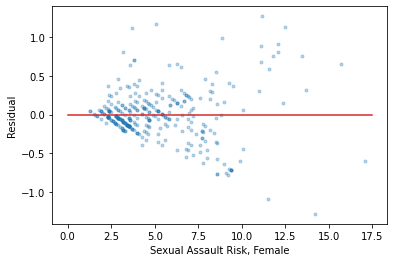

In [13]:
plt.scatter(x, y - linear_model.predict(x), marker=".", color="tab:blue", alpha=0.3)
plt.plot(np.linspace(0, 17.5, 10), [0] * 10, color="tab:red");
plt.xlabel("Sexual Assault Risk, Female");
plt.ylabel("Residual");

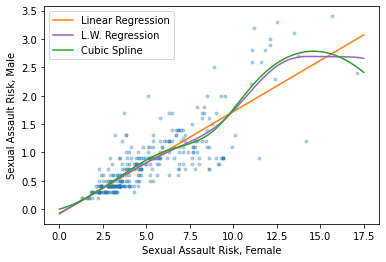

In [14]:
plotx = np.linspace(0, 17.5, 500)
linear_y = linear_model.predict(plotx)
spline_y = spline_model.predict(plotx)
local_linear_y = local_linear_model.predict(plotx)
plt.scatter(x, y, marker=".", color="tab:blue", alpha=0.3);
plt.plot(plotx, linear_y, color="tab:orange");
plt.plot(plotx, local_linear_y, color="tab:purple");
plt.plot(plotx, spline_y, color="tab:green");
plt.xlabel("Sexual Assault Risk, Female");
plt.ylabel("Sexual Assault Risk, Male");
plt.legend(['Linear Regression', 'L.W. Regression', 'Cubic Spline']);

In [7]:
print("Pearson R:", pearsonr(x, y))
print("Spearman R:", spearmanr(x, y))
print("R^2:", r2_score(y, linear_model.predict(x)))

Pearson R: (0.832552338375952, 6.434754834270746e-87)
Spearman R: SpearmanrResult(correlation=0.8522992671115436, pvalue=3.545201056977204e-95)
R^2: 0.6931433961352658
